Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
Tasks:
1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [ ]:
##EDA2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
%matplotlib inline
import numpy as np

In [72]:
df=pd.read_csv(r'D:\Admin\Downloads\ed2.csv')

In [74]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [76]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

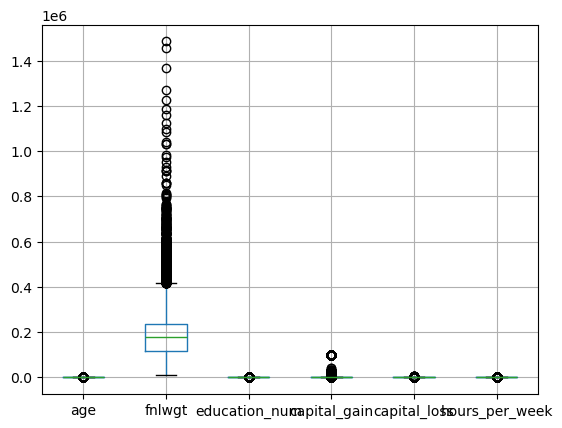

In [78]:
df.boxplot()

In [80]:
df.isna()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [82]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [84]:
df.value_counts()

age  workclass          fnlwgt  education      education_num  marital_status       occupation          relationship    race    sex      capital_gain  capital_loss  hours_per_week  native_country  income
25    Private           195994   1st-4th       2               Never-married        Priv-house-serv     Not-in-family   White   Female  0             0             40               Guatemala       <=50K    3
23    Private           240137   5th-6th       3               Never-married        Handlers-cleaners   Not-in-family   White   Male    0             0             55               Mexico          <=50K    2
38    Private           207202   HS-grad       9               Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0             0             48               United-States   >50K     2
30    Private           144593   HS-grad       9               Never-married        Other-service       Not-in-family   Black   Male    0             0             40       

In [86]:
df = pd.get_dummies(df)

In [88]:
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [90]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [92]:
sc = StandardScaler()

In [94]:
df.head(5)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [96]:
sc.fit_transform(df)

array([[ 0.03067056, -1.06361075,  1.13473876, ..., -0.02217266,
         0.56319851, -0.56319851],
       [ 0.83710898, -1.008707  ,  1.13473876, ..., -0.02217266,
         0.56319851, -0.56319851],
       [-0.04264203,  0.2450785 , -0.42005962, ..., -0.02217266,
         0.56319851, -0.56319851],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ..., -0.02217266,
         0.56319851, -0.56319851],
       [-1.21564337,  0.11095988, -0.42005962, ..., -0.02217266,
         0.56319851, -0.56319851],
       [ 0.98373415,  0.92989258, -0.42005962, ..., -0.02217266,
        -1.77557289,  1.77557289]])

In [98]:
x = sc.fit_transform(df)
x

array([[ 0.03067056, -1.06361075,  1.13473876, ..., -0.02217266,
         0.56319851, -0.56319851],
       [ 0.83710898, -1.008707  ,  1.13473876, ..., -0.02217266,
         0.56319851, -0.56319851],
       [-0.04264203,  0.2450785 , -0.42005962, ..., -0.02217266,
         0.56319851, -0.56319851],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ..., -0.02217266,
         0.56319851, -0.56319851],
       [-1.21564337,  0.11095988, -0.42005962, ..., -0.02217266,
         0.56319851, -0.56319851],
       [ 0.98373415,  0.92989258, -0.42005962, ..., -0.02217266,
        -1.77557289,  1.77557289]])

In [100]:
pd.DataFrame(x, columns=df.columns)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173,0.563199,-0.563199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,-1.775573,1.775573
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199


In [102]:
df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwan', 'native_country_ Thailand',
       'native_country_ Trinadad&Tobago', 'native_country_ United-States',
       'native_country_ Vietnam', 'native_country_ Yugoslavia',
       'income_ <=50K', 'income_ >50K'],
      dtype='object', length=110)

In [104]:
scaled_data = pd.DataFrame(x, columns=df.columns)
scaled_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173,0.563199,-0.563199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,-1.775573,1.775573
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0.563199,-0.563199


In [106]:
scaled_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,...,3.256100e+04,3.256100e+04,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17,-2.225833e-17,-3.927941e-17,-5.673693e-18,-2.836846e-18,...,7.310335e-18,1.549355e-17,0.000000,2.618627e-18,-8.728758e-18,1.414059e-16,2.302210e-17,5.237255e-18,-1.833039e-17,1.833039e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,...,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,-2.932948e+00,-4.540836e-02,-2.217266e-02,-1.775573e+00,-5.631985e-01
25%,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,...,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,3.409539e-01,-4.540836e-02,-2.217266e-02,5.631985e-01,-5.631985e-01
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,...,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,3.409539e-01,-4.540836e-02,-2.217266e-02,5.631985e-01,-5.631985e-01
75%,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,...,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,3.409539e-01,-4.540836e-02,-2.217266e-02,5.631985e-01,-5.631985e-01
max,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00,4.090813e+00,5.737396e+00,3.815376e+00,6.819510e+01,...,5.208087e+01,2.014975e+01,25.247792,4.251993e+01,4.138522e+01,3.409539e-01,2.202238e+01,4.510058e+01,5.631985e-01,1.775573e+00


In [108]:
mn = MinMaxScaler()

In [110]:
df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwan', 'native_country_ Thailand',
       'native_country_ Trinadad&Tobago', 'native_country_ United-States',
       'native_country_ Vietnam', 'native_country_ Yugoslavia',
       'income_ <=50K', 'income_ >50K'],
      dtype='object', length=110)

In [112]:
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [114]:
minmax_scaled = pd.DataFrame(mn.fit_transform(df), columns=df.columns)
minmax_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [116]:
minmax_scaled.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.120545,0.605379,0.010777,0.020042,0.402423,0.056386,0.029483,0.064279,0.000215,...,0.000369,0.002457,0.001566,0.000553,0.000584,0.895857,0.002058,0.000491,0.759190,0.240810
std,0.186855,0.071685,0.171515,0.073854,0.092507,0.125994,0.230670,0.169159,0.245254,0.014661,...,0.019194,0.049507,0.039546,0.023506,0.024149,0.305451,0.045316,0.022162,0.427581,0.427581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.424658,0.152651,0.733333,0.000000,0.000000,0.448980,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Feature Selection:
#Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
#Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [118]:
!pip install ppscore

In [119]:
import ppscore as ps

In [120]:
ps.score(df,x='age',y='hours_per_week')

{'x': 'age',
 'y': 'hours_per_week',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 7.6564,
 'model_score': 8.129102125681404,
 'model': DecisionTreeRegressor()}

In [121]:
feature_sel=ps.matrix(df)

In [122]:
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,fnlwgt,0.0,regression,True,mean absolute error,75872.1862,77535.141544,DecisionTreeRegressor()
2,age,education_num,0.0,regression,True,mean absolute error,1.8530,1.898306,DecisionTreeRegressor()
3,age,capital_gain,0.0,regression,True,mean absolute error,1093.8840,2003.391960,DecisionTreeRegressor()
4,age,capital_loss,0.0,regression,True,mean absolute error,94.9426,177.745741,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
12095,income_ >50K,native_country_ United-States,0.0,regression,True,mean absolute error,0.1080,0.192238,DecisionTreeRegressor()
12096,income_ >50K,native_country_ Vietnam,0.0,regression,True,mean absolute error,0.0026,0.005189,DecisionTreeRegressor()
12097,income_ >50K,native_country_ Yugoslavia,0.0,regression,True,mean absolute error,0.0012,0.002405,DecisionTreeRegressor()
12098,income_ >50K,income_ <=50K,1.0,regression,True,mean absolute error,0.2424,0.000000,DecisionTreeRegressor()


In [123]:

iso = IsolationForest()

iso.fit(df)
ypred = iso.predict(df)
ypred

array([1, 1, 1, ..., 1, 1, 1])

In [124]:
len(ypred)

32561

<Axes: xlabel='age', ylabel='hours_per_week'>

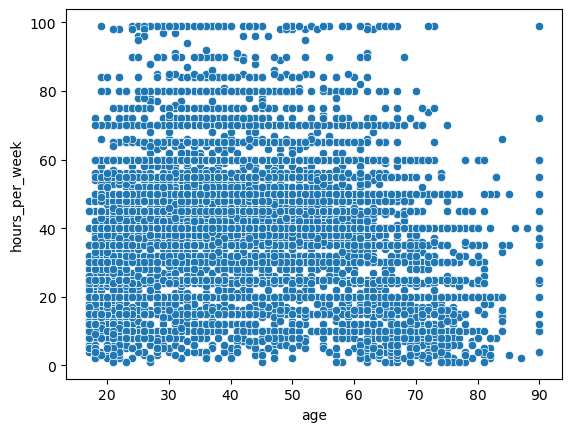

In [128]:
sns.scatterplot(x = df['age'],y = df['hours_per_week'])

In [129]:
df['Outliers'] = ypred

df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K,Outliers
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [141]:
#feature engineering

In [130]:
df['net_capital'] = df['capital_gain'] - df['capital_loss']
df['education_age_interaction'] = df['education_num'] * df['age']

# Apply log transformation to fnlwgt
df['log_fnlwgt'] = np.log(df['fnlwgt'] + 1)

In [139]:
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K,Outliers,net_capital,education_age_interaction,log_fnlwgt
0,39,77516,13,2174,0,40,0,0,0,0,...,0,1,0,0,1,0,1,2174,507,11.258253
1,50,83311,13,0,0,13,0,0,0,0,...,0,1,0,0,1,0,1,0,650,11.330348
2,38,215646,9,0,0,40,0,0,0,0,...,0,1,0,0,1,0,1,0,342,12.281398
3,53,234721,7,0,0,40,0,0,0,0,...,0,1,0,0,1,0,1,0,371,12.366157
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,1,0,1,0,364,12.732013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,1,0,0,1,0,1,0,324,12.458010
32557,40,154374,9,0,0,40,0,0,0,0,...,0,1,0,0,0,1,1,0,360,11.947140
32558,58,151910,9,0,0,40,0,0,0,0,...,0,1,0,0,1,0,1,0,522,11.931050
32559,22,201490,9,0,0,20,0,0,0,0,...,0,1,0,0,1,0,1,0,198,12.213500
